In [348]:
import pandas as pd
import numpy as np
import plotly.express as px
import dash
from dash import Dash, dcc, html
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output
from dash.dash_table import DataTable

In [357]:
df = pd.read_excel('ecom_sales.xlsx')
df = df[['Invoice', 'Description', 'Price', 'Quantity', 'Customer ID', 'Country']]
df.head()

,Invoice,Description,Price,Quantity,Customer ID,Country
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,12,13085.0,United Kingdom
1,489434,PINK CHERRY LIGHTS,6.75,12,13085.0,United Kingdom
2,489434,WHITE CHERRY LIGHTS,6.75,12,13085.0,United Kingdom
3,489434,"RECORD FRAME 7"" SINGLE SIZE",2.10,48,13085.0,United Kingdom
4,489434,STRAWBERRY CERAMIC TRINKET BOX,1.25,24,13085.0,United Kingdom


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   Description  522533 non-null  object 
 2   Price        525461 non-null  float64
 3   Quantity     525461 non-null  int64  
 4   Customer ID  417534 non-null  float64
 5   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.1+ MB


Valeurs nulles dans les colonnes **'Description'** et **'Customer ID'**.

Pour notre cas, nous procéderons à un nettoyage au niveau des colonnes **'Description'** et **'OrderValue'** (créé ci-dessous).

In [359]:
df['OrderValue'] = (df['Price'] * df['Quantity']).round(2)
df

,Invoice,Description,Price,Quantity,Customer ID,Country,OrderValue
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,12,13085.0,United Kingdom,83.40
1,489434,PINK CHERRY LIGHTS,6.75,12,13085.0,United Kingdom,81.00
2,489434,WHITE CHERRY LIGHTS,6.75,12,13085.0,United Kingdom,81.00
3,489434,"RECORD FRAME 7"" SINGLE SIZE",2.10,48,13085.0,United Kingdom,100.80
4,489434,STRAWBERRY CERAMIC TRINKET BOX,1.25,24,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...
525456,538171,FELTCRAFT DOLL ROSIE,2.95,2,17530.0,United Kingdom,5.90
525457,538171,FELTCRAFT PRINCESS LOLA DOLL,3.75,1,17530.0,United Kingdom,3.75
525458,538171,FELTCRAFT PRINCESS OLIVIA DOLL,3.75,1,17530.0,United Kingdom,3.75
525459,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,3.75,2,17530.0,United Kingdom,7.50


In [360]:
df = df.loc[df['OrderValue'] > 0]
df

,Invoice,Description,Price,Quantity,Customer ID,Country,OrderValue
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,12,13085.0,United Kingdom,83.40
1,489434,PINK CHERRY LIGHTS,6.75,12,13085.0,United Kingdom,81.00
2,489434,WHITE CHERRY LIGHTS,6.75,12,13085.0,United Kingdom,81.00
3,489434,"RECORD FRAME 7"" SINGLE SIZE",2.10,48,13085.0,United Kingdom,100.80
4,489434,STRAWBERRY CERAMIC TRINKET BOX,1.25,24,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...
525456,538171,FELTCRAFT DOLL ROSIE,2.95,2,17530.0,United Kingdom,5.90
525457,538171,FELTCRAFT PRINCESS LOLA DOLL,3.75,1,17530.0,United Kingdom,3.75
525458,538171,FELTCRAFT PRINCESS OLIVIA DOLL,3.75,1,17530.0,United Kingdom,3.75
525459,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,3.75,2,17530.0,United Kingdom,7.50


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511552 entries, 0 to 525460
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      511552 non-null  object 
 1   Description  511552 non-null  object 
 2   Price        511552 non-null  float64
 3   Quantity     511552 non-null  int64  
 4   Customer ID  407650 non-null  float64
 5   Country      511552 non-null  object 
 6   OrderValue   511552 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 31.2+ MB


In [363]:
ecom_sales = df.groupby('Country')['OrderValue'].agg('sum').reset_index(name='Total Sales ($)')
ecom_sales

,Country,Total Sales ($)
0,Australia,31446.80
1,Austria,13414.33
2,Bahrain,2355.65
3,Belgium,24557.08
4,Bermuda,1253.14
5,Brazil,268.27
6,Canada,1216.66
7,Channel Islands,24546.32
8,Cyprus,11389.75
9,Denmark,50906.85


In [364]:
ecom_sales.shape

(40, 2)

- Cliquer sur un pays dans la légende pour le désactiver et changer l'apparence du graphique
- Sélectionner une zone pour zoomer

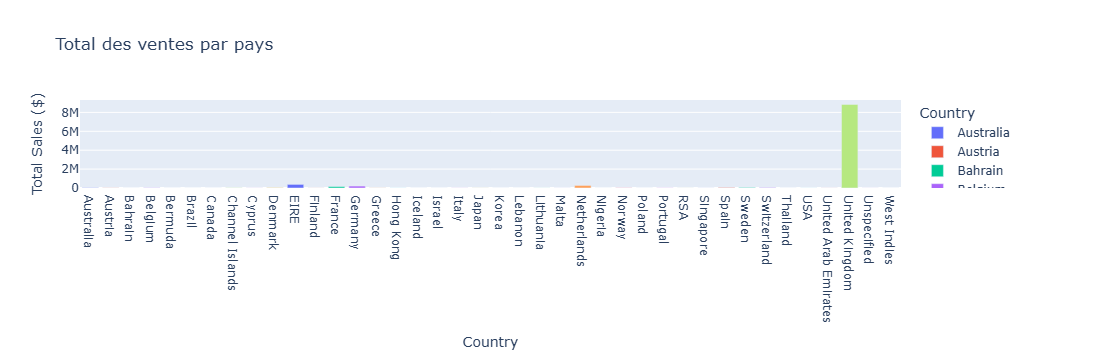

In [336]:
bar_fig = px.bar(
    data_frame=ecom_sales,
    x='Country',
    y='Total Sales ($)',
    color='Country',
    title='Total des ventes par pays'
)

# bar_fig.update_layout(
#     height=1000
# )

bar_fig.show()

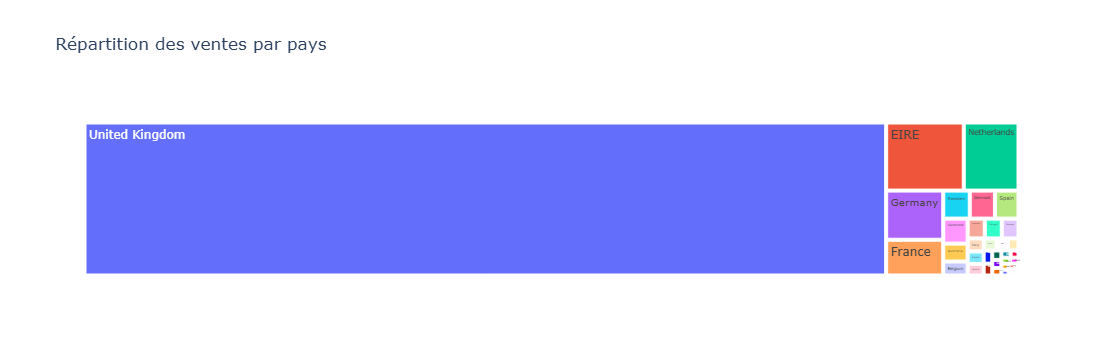

In [337]:
treemap_fig = px.treemap(
    data_frame=ecom_sales,
    path=['Country'],
    values='Total Sales ($)',
    title='Répartition des ventes par pays'
)

treemap_fig.show()

In [365]:
ecom_sales2 = df.groupby('Country')[['OrderValue', 'Quantity']].agg('sum').reset_index()
ecom_sales2.head()

,Country,OrderValue,Quantity
0,Australia,31446.80,20189
1,Austria,13414.33,6697
2,Bahrain,2355.65,1025
3,Belgium,24557.08,12065
4,Bermuda,1253.14,2798


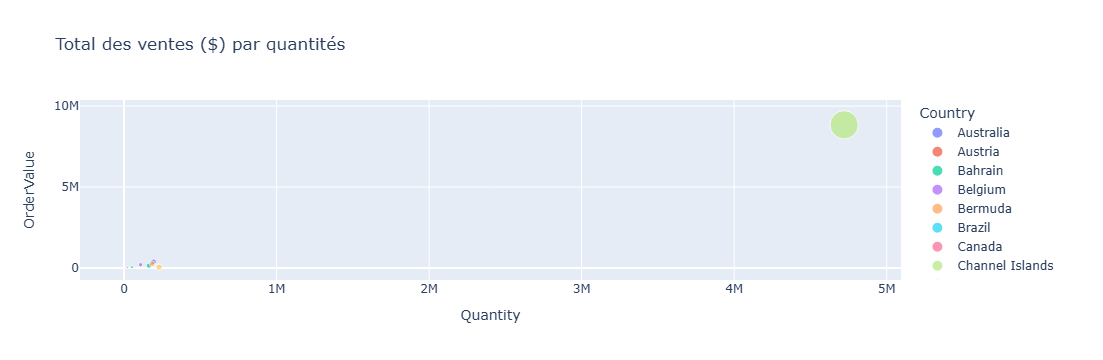

In [339]:
scatter_fig = px.scatter(ecom_sales2, x = 'Quantity', y = 'OrderValue', color = 'Country', size = 'Quantity', title = 'Total des ventes ($) par quantités')
scatter_fig

In [366]:
ecom_sales_sorted = ecom_sales.sort_values(by='Total Sales ($)', ascending = False)
ecom_sales_sorted.head()

,Country,Total Sales ($)
37,United Kingdom,8846129.25
10,EIRE,380977.82
24,Netherlands,268786.00
13,Germany,202395.32
12,France,147211.49


In [341]:
top_country = ecom_sales_sorted.iloc[0]['Country']
top_country

'United Kingdom'

In [ ]:
def make_break(num_breaks):
    br_list = [html.Br()] * num_breaks
    return br_list

def style_c():
    layout_style = {'display':'inline-block', 'margin':'0 auto', 'padding':'20px'}
    return layout_style

app = Dash(__name__)

app.layout = html.Div([
    html.H1('Tableau de bord des ventes'),
    *make_break(3),

    html.Div(
        children = [
            html.Div(
                children = [
                    html.H2('Controls', style = style_c()),
                    html.H3('Rechercher des descriptions'),
                    *make_break(2),

                    dcc.Input(id = 'search_desc', type = 'text', placeholder = 'Filtrer les descriptions de produits', debounce = True, required = False, style = {'width':'200px', 'height':'30px'})
                ],

                style = {'width':'350px', 'height':'350px', 'vertical-align':'top', 'border':'1px solid black', 'display':'inline-block', 'margin':'0px 80px'}
            ),

            html.Div(
                children = [
                    dcc.Graph(id = 'sales_desc')
                ],
                style = {'width':'700px', 'display':'inline-block'}
            )
        ]
    )
],
                      style = {'text-align':'center', 'display':'inline-block', 'width':'100%'})

@app.callback(
    Output(component_id = 'sales_desc', component_property = 'figure'),
    Input(component_id = 'search_desc', component_property = 'value')
)

def update_plot(search_value):
    title_value = 'Toutes les descriptions'
    sales = df.copy()

    if search_value:
        sales = sales[sales['Description'].str.contains(search_value, case = False)]
        title_value = search_value
        
    fig = px.scatter(data_frame = sales, y = 'OrderValue', x = 'Quantity', size = 'OrderValue', color = 'Country', title=f'Produits avec texte de description : {title_value}')
    return fig

if __name__ == '__main__':
    app.run_server(debug = True)

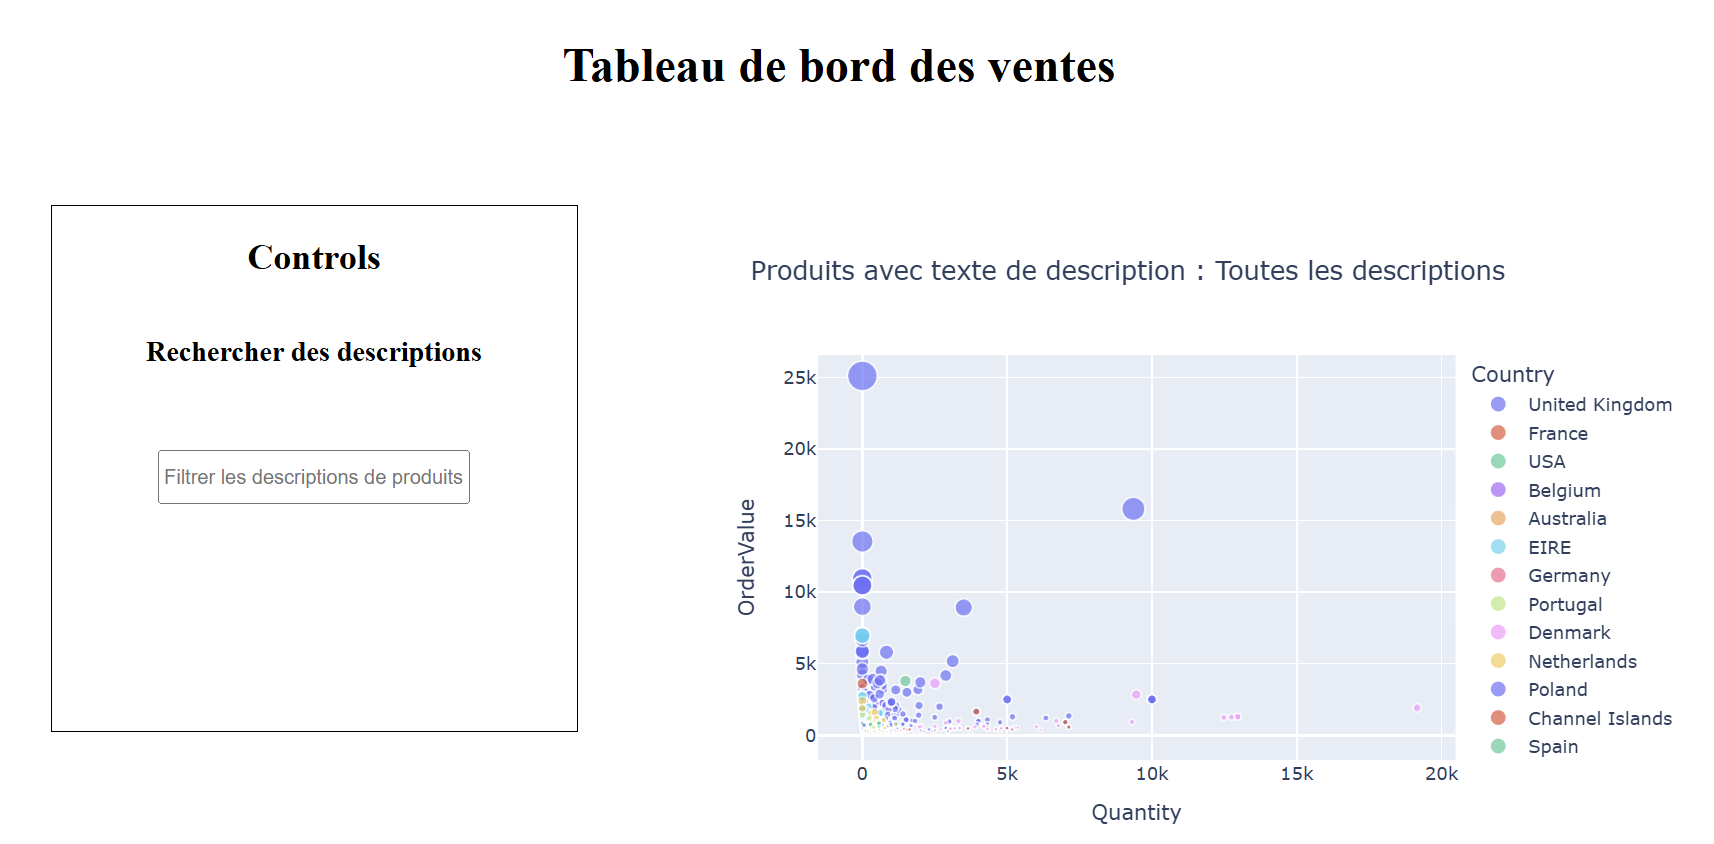

Après application du filtre : on veut toutes faire apparaître les données des commandes contenant le mot *"glass"*.

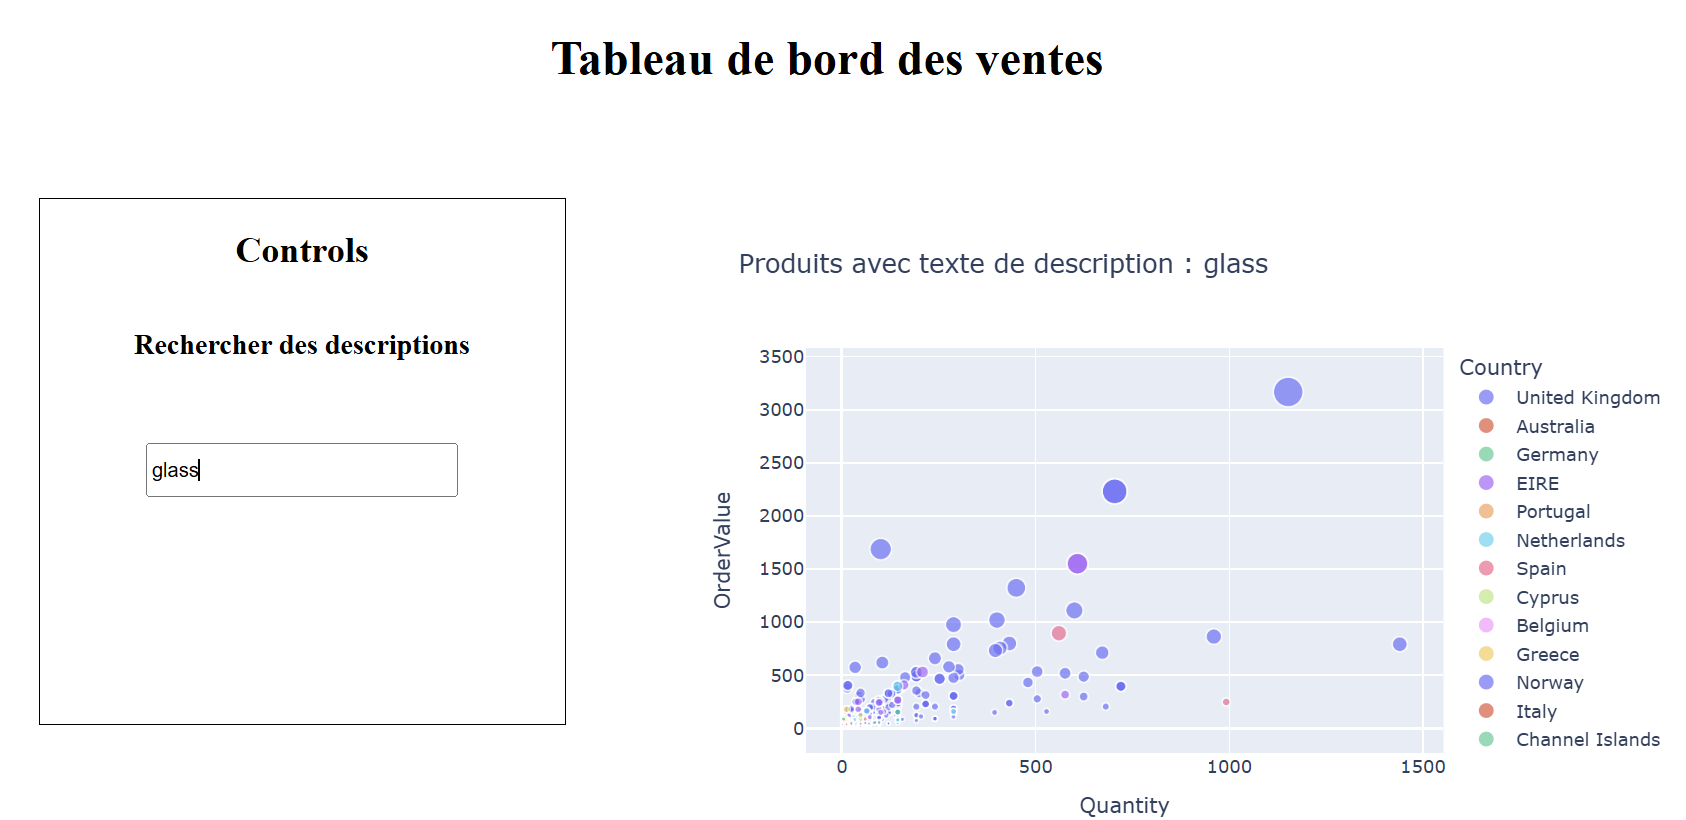

In [368]:
df.columns

Index(['Invoice', 'Description', 'Price', 'Quantity', 'Customer ID', 'Country',
       'OrderValue'],
      dtype='object')

In [369]:
[{'name' : x, 'id' : x} for x in df.columns]

[{'name': 'Invoice', 'id': 'Invoice'},
 {'name': 'Description', 'id': 'Description'},
 {'name': 'Price', 'id': 'Price'},
 {'name': 'Quantity', 'id': 'Quantity'},
 {'name': 'Customer ID', 'id': 'Customer ID'},
 {'name': 'Country', 'id': 'Country'},
 {'name': 'OrderValue', 'id': 'OrderValue'}]

In [370]:
d_columns = [{'name' : x, 'id' : x} for x in df.columns]

d_table = DataTable(
    columns = d_columns,
    data = df.to_dict('records'),
    cell_selectable = False,
    sort_action = 'native',
    filter_action = 'native',
    page_action = 'native',
    page_current = 0,
    page_size = 10
)

app = Dash(__name__)

app.layout = html.Div([
    html.H1('Table de données des ventes'),
    html.Div(children = [d_table], style = {'width':'850px', 'height':'750px', 'margin':'0 auto'})
], style = {'text-align':'center', 'display':'inline-block', 'width':'100%'})

if __name__ == '__main__':
    app.run_server(debug=True)